# Part I - (Exploration of the Ford GoBike System Dataset)
## by Mwezi Chipeta

## Introduction
The dataset I'll be investigating will be based on individual rides system in the greater San Francisco Bay area in February 2019.The goal is to clean and prepare this data set to make visualizations and communicate the important findings in a report and presentation.
The monthly statistics are provided by Bay Wheels and these can be viewed on their website https://www.lyft.com/bikes/bay-wheels/system-data.


## Preliminary Wrangling


### Gather Data

In [132]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [133]:
#loading dataset into pandas dataframe
GoBike = pd.read_csv ('201902-fordgobike-tripdata.csv')
GoBike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


### Assess Data

In [134]:
#Display the datatypes as well as total entries and columns
GoBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [135]:
#Display the statistics of the dataframe
GoBike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [136]:
#Displaying the number of observations under each variable
GoBike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

#### Observations:

- Change the start_time and end_time variable datatypes from object to datetime

- Extract day of week and month of year

- Change the duration_sec to duration_min for an easier comparison

- Change user_type and gender to categorical datatype

### Clean Data

In [137]:
#Change the data type for start and end time to be datetime64[ns] 
GoBike.start_time = pd.to_datetime(GoBike.start_time)
GoBike.end_time = pd.to_datetime(GoBike.end_time)

In [138]:
#Replace the missing values in member_gender with "Other"
GoBike['member_gender'] = GoBike['member_gender'].fillna('Other').astype(object)

In [139]:
#Change the member_gender and user_type to categorical datatype
GoBike['member_gender'] = GoBike['member_gender'].astype('category')
GoBike['user_type'] = GoBike['user_type'].astype('category')

In [140]:
#Change the datatype for bike_share_for_all_trip to be boolean
GoBike.bike_share_for_all_trip = (GoBike.bike_share_for_all_trip == 'Yes')

In [141]:
#Extracting days of the week and months of the year
GoBike['day of the week'] = GoBike.start_time.dt.strftime('%A').astype("category")
GoBike['month'] = GoBike.start_time.dt.strftime('%m').astype("category")
GoBike ['year'] = GoBike.start_time.dt.strftime('%Y').astype("int")

In [142]:
#Extracting the ages of the users of Ford GoBike
GoBike['age'] = GoBike['year'] - GoBike['member_birth_year']

In [143]:
#Extracting the time of the day users utilise Ford GoBike
GoBike['time_of_day'] = GoBike.start_time.dt.strftime('%H')

In [144]:
#Extracting the minutes taken per trip
GoBike['duration_min'] = GoBike['duration_sec']/60

In [145]:
#Displaying the duration variable column
GoBike['duration_min'].head(10)

0     869.750000
1     708.683333
2    1030.900000
3     608.166667
4      26.416667
5      29.883333
6      19.116667
7      26.916667
8      26.166667
9      17.483333
Name: duration_min, dtype: float64

In [146]:
#Display of data shape and composition
print(GoBike.shape)
print(GoBike.dtypes)
print(GoBike.head(10))

(183412, 22)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip              bool
day of the week                  category
month                            category
year                                int32
age                               float64
time_of_day                        object
duration_min                      float64
dtype: object
   duration_sec              start_time          

In [147]:
GoBike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,year,age,duration_min
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.0,175147.000000,183412.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,2019.0,34.193563,12.101307
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,0.0,10.116689,29.906496
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,2019.0,18.000000,1.016667
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,2019.0,27.000000,5.416667
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,2019.0,32.000000,8.566667
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,2019.0,39.000000,13.266667
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,2019.0,141.000000,1424.066667


### What is the structure of your dataset?

> There are 183412 rows and 22 columns for fordgobike in the dataset with the following variables (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, duration_min, day of the week, month, year and age, time_of_day). There are 12 numerical data types, 2 datetime, 3 object types, 1 is a boolean type and 4 are category data types.

### What is/are the main feature(s) of interest in your dataset?

> How long the average trip is?

> When are the most trips taken?

> Whether the user is a customer or subscriber, their gender, or their age?
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The user_type (Either a customer or a subscriber), gender, member birth year and age, and time (hour of the day or day of the week).

In [148]:
# Save the wrangled dataframe for visualization in the presentation.
GoBike.to_csv('201902-fordgobike-tripdata-clean-version.csv')

## Univariate Exploration

**1. Are there any outliers in the age?**

In [149]:
def x_y_t(xL, yL, title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
color = sb.color_palette()[2]

[]

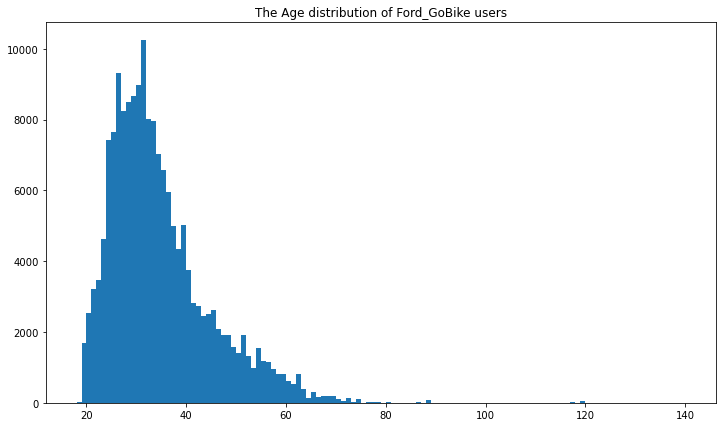

In [150]:
plt.figure(figsize=[12, 7])

bins = np.arange(GoBike['age'].min(), GoBike['age'].max())
plt.title('The Age distribution of Ford_GoBike users')
plt.hist(GoBike['age'], bins = bins);
plt.plot(xL = 'age', yL= 'count')

_- As shown above, the graph is skewed right indicating majority of users fall between the ages of 27 and 39._

_-There are outliers present but we will be focusing on participants between the ages of 18 and 60._


**2. What is the usage distribution between genders and which is the most popular?**

[]

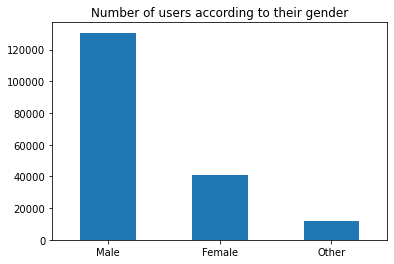

In [151]:
genders = GoBike['member_gender'].value_counts()
genders.plot.bar(rot=0);
plt.title("Number of users according to their gender");
plt.plot(xL = 'Gender', yL = 'count')

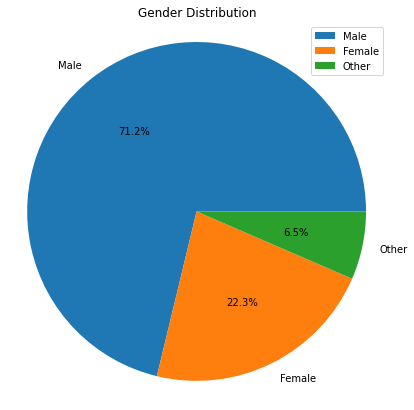

In [152]:
#Assigning gender a new variable name
genders = GoBike.member_gender.value_counts()

#Pie Distribution of the Gender
plt.figure(figsize=[12, 7])
plt.pie(genders, labels = genders.index, autopct='%1.1f%%')
plt.legend()
plt.title("Gender Distribution")
plt.axis('square');

_- The male gender was the most popular with significantly more than half the users of Ford GoBike compared to females and other._

**3. How many customers are there compared to subscribers?**

[]

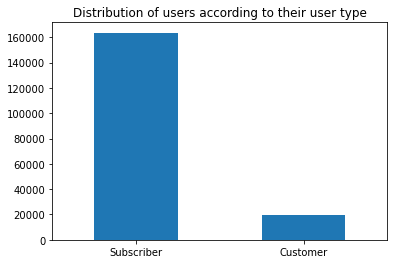

In [153]:
user_type = GoBike['user_type'].value_counts();
user_type.plot.bar(rot=0);
plt.title("Distribution of users according to their user type");
plt.plot(xL = 'User Type', yL = 'Count')

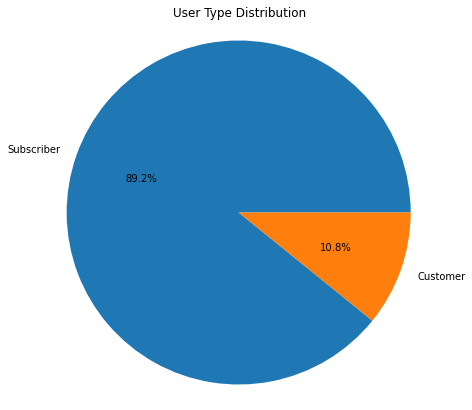

In [154]:
user_type = GoBike.user_type.value_counts()

#Pie Distribution of the User Type
plt.figure(figsize=[12, 7])
plt.pie(user_type, labels = user_type.index, autopct='%1.1f%%')
plt.title("User Type Distribution")
plt.axis('square');

_- As seen above, the majority of users using Ford GoBike are subscribers._

**4. How many people in the San Francisco Bay area use the Bike share system?**

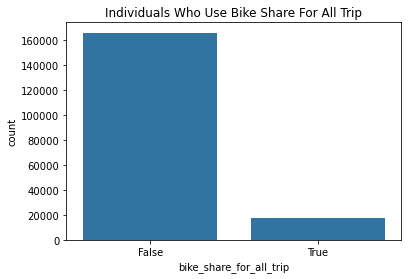

In [155]:
base_color = sb.color_palette()[0]

sb.countplot(data = GoBike, x = 'bike_share_for_all_trip', color= base_color);
plt.title("Individuals Who Use Bike Share For All Trip");

_-There are not a lot of individuals who utilise the Bike Share System in San Francisco Bay Area_

**5. Which day/s were the most utilised by users of the Bike share system?**

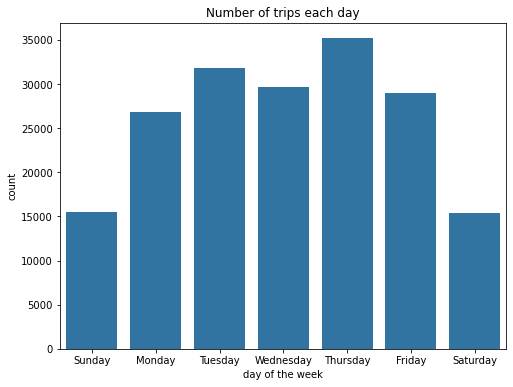

In [156]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=[8, 6])
sb.countplot(data = GoBike, x='day of the week', color = base_color, order = days);
plt.title("Number of trips each day");

_- The busiest day of the week is Thursday followed by Tuesday, Wednesday, Friday then Monday._

_- Saturday and Sunday have the same amount of trips done._

**6. What is the most active time of day for users?**

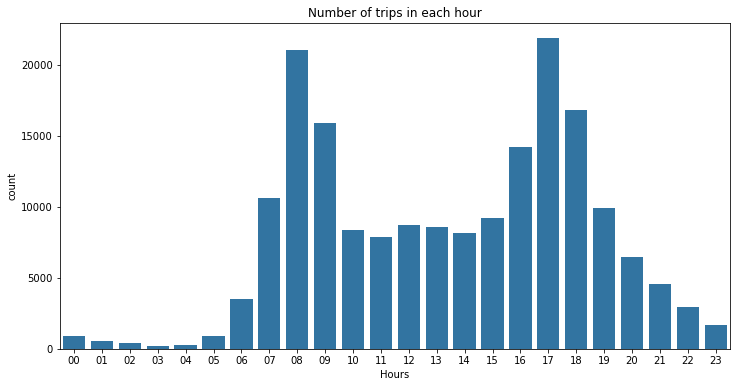

In [157]:
hour_order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19',
              '20','21','22','23']
plt.figure(figsize=[12, 6])
sb.countplot(data = GoBike, x='time_of_day', color = base_color, order=hour_order);
plt.xlabel('Hours');
plt.title("Number of trips in each hour");

_- Most trips were taken at 17 hours, followed by 08 hours._

_-The least trips were taken between 03 hours and 04 hours._

**7. How long were most trips in minutes?**

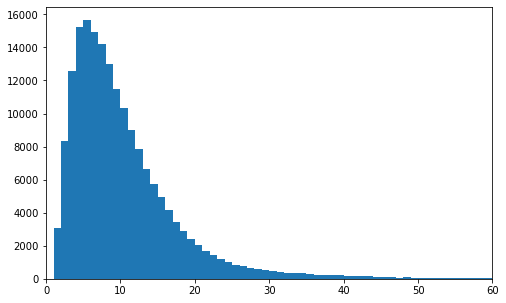

In [158]:
bins = np.arange(0, GoBike['duration_min'].max()+1, 1)
#sb.countplot(data=GoBike,x='duration_min', color=sb.color_palette()[0])
plt.figure(figsize=[8, 5])
plt.hist(data = GoBike, x = 'duration_min', bins = bins)
plt.xlim([0,60])
plt.plot(xL = 'Trip Duration in Minutes', yL = 'Count')
plt.show()

_- As seen above, the graph is skewed right which indicates that majority of the users had a shorter trip duration._

_-Most trips were less than 30 minutes._


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There are more subscribers than customers.

> There are more males than females and other.

> There were outliers when it came to age and duration_min. These were explored and as only certain parts of the variables were being inspected, the outliers were ignored.

>The distribution of the hours of day is binomial. Most trips takes place between 07 hours to 09 hours and from 16 hours to 18 hours. There aren't many trips from 24 hours to 05 hours.

> Bike users mostly utilised the Bike system on Thursdays with a consistent usage on both Saturday and Sunday. Monday is the least busiest day of the week.

> There are not a lot of people who use the Bike share system in San Francisco.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The data wrangling process were simple steps like changing categorical data types as 'Categorical' to be able to plot using Seaborn. Changing the time (start time and end time) to pandas datetime type to easily extract the hours of day and day of week from the dates. Changing bike share for all trip data from object to boolean as there were only two possible answers to the question

## Bivariate Exploration

#### 1. Trip Duration in minutes by different user types

([<matplotlib.axis.YTick at 0x1680aa1f6a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

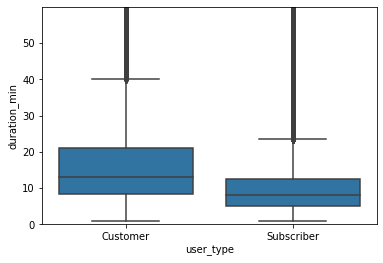

In [159]:
# Boxplot between the duration_min and the user_type
sb.boxplot(data=GoBike, x='user_type', y='duration_min', color=base_color)
# Limit the y-axis to 60 to have closer look of the plot
plt.ylim(0, 60)
# Apply y-ticks up to 60
plt.yticks(ticks = [x for x in range(0,60,10)])

- Customers utilise their bikes more than subscribers as their trip duration is longer.

#### 2. Trip Duration by different ages

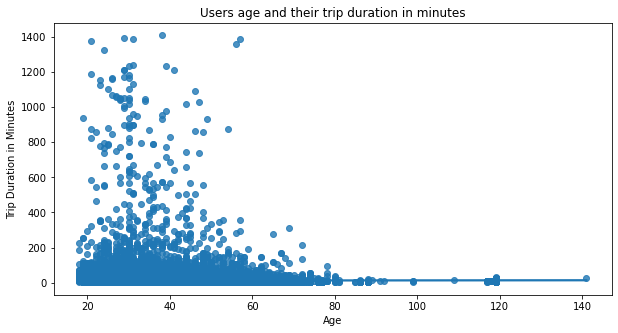

In [160]:
plt.figure(figsize=[10, 5])
sb.regplot(data = GoBike, x='age', y='duration_min');
plt.xlabel('Age');
plt.ylabel('Trip Duration in Minutes');
plt.title('Users age and their trip duration in minutes');

- The ages between 20 and 40 had a fairly shorter trip duration than those older.

#### 3. Member gender with their User type

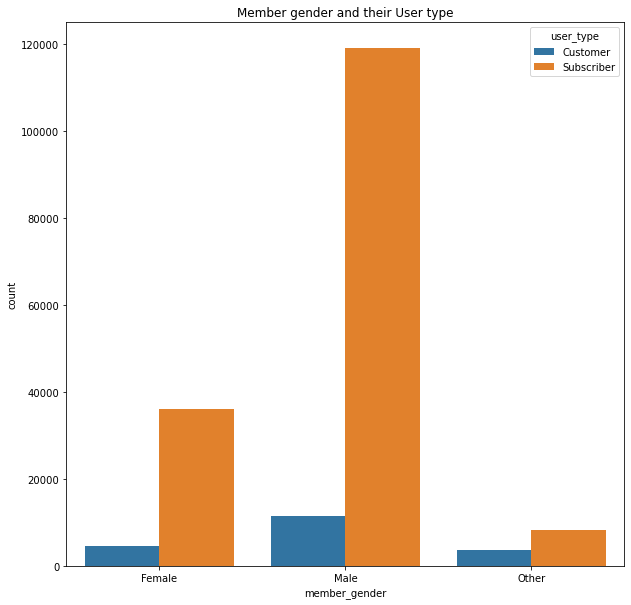

In [161]:
plt.figure(figsize = [10, 10]);

sb.countplot(data = GoBike, x = 'member_gender', hue = 'user_type');

plt.title('Member gender and their User type');

- Subscribers were more than customers with the male gender having the most subscribers.

#### 4. Trip Duration by member_gender

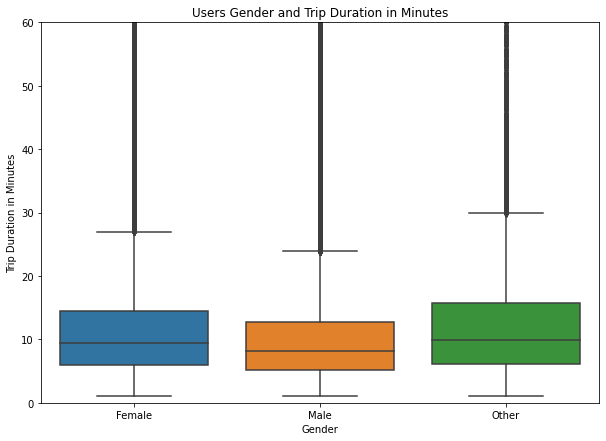

In [162]:
plt.figure(figsize=[10, 7])
sb.boxplot(data = GoBike, x='member_gender', y='duration_min');
plt.ylim(0, 60);
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minutes');
plt.title('Users Gender and Trip Duration in Minutes');

- The Other gender's average bike trip duration is more than that of female and male users

#### 5. Trip Duration in Minutes as per day of the week

Text(0, 0.5, 'Trip Duration in Minutes')

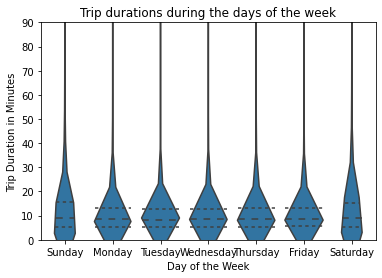

In [163]:
# Violoin plot between day of the week and duration_min
sb.violinplot(data=GoBike, x='day of the week', y='duration_min', order= ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'), color = base_color, inner='quartile')
# Limit the y-axis up to 40
plt.ylim(0, 40)
plt.yticks(ticks = [x for x in range(0,100,10)])
plt.title("Trip durations during the days of the week")
plt.xlabel("Day of the Week")
plt.ylabel("Trip Duration in Minutes")

- The weekday's plot patterns (Monday to Friday) look similar like that of the weekend (Saturday and Sunday).
- However, the weekday's have a wider, shorter adjacent value than that of the weekend.

####  6. Weekday between genders and user_types

Text(0, 0.5, 'Gender')

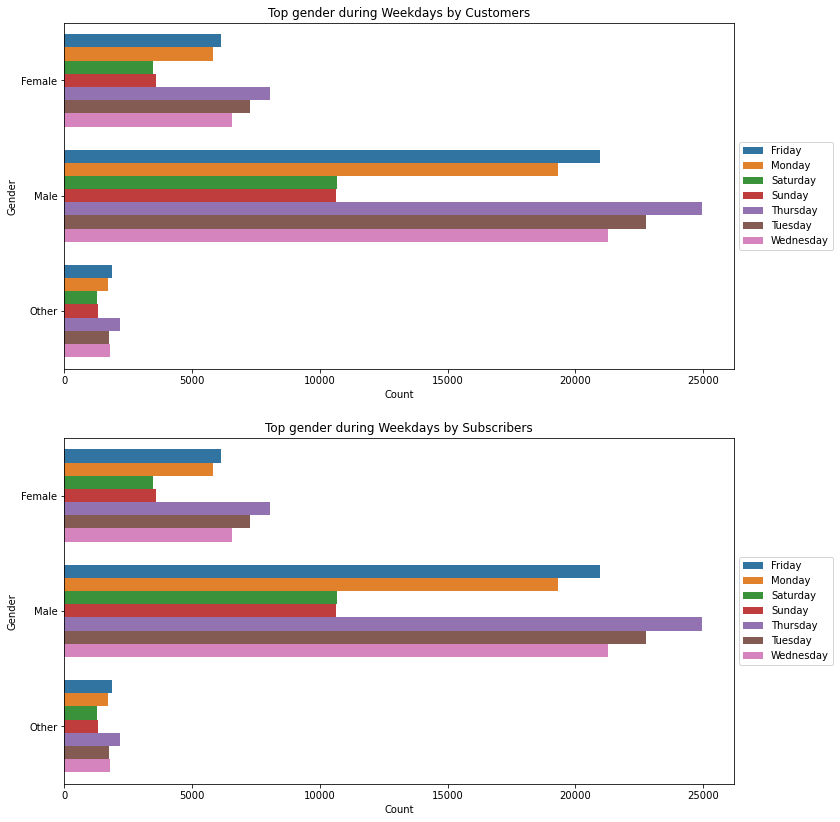

In [164]:
#3 categorical variables using countplot: Weekday between customers and subscribers
plt.figure(figsize=(12,14))
ax = plt.subplot(211)
sb.countplot(data=GoBike, y='member_gender', hue='day of the week')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top gender during Weekdays by Customers')
plt.xlabel('Count')
plt.ylabel('Gender')

ax = plt.subplot(212)
sb.countplot(data=GoBike, y='member_gender', hue='day of the week')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Top gender during Weekdays by Subscribers')
plt.xlabel('Count')
plt.ylabel('Gender')

_- There's more male subscribers and customers than any gender_


## Multivariate Exploration

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Trip durations during the days of the week don't vary as much. Neither do those of the weekend.

> Users between the ages of 20 and 40 have the shortest trip duration, however, they also have the longest ones.

> The Other gender uses significantly more time with their trip duration followed by females and males.

> There are more subscribers than customers despite gender.

> Customers have a longer trip duration than subscribers.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Trip duration time on the weekdays have identical pattern duration times, however, the average duration time on the weekends are longer than that of the weekdays.

> Customers utitlise the service for a longer duration time than Subscribers.

> Trip duration for female users and customer users is longer despite their low count in the dataset.

#### 1. User Types' Age and Trip Duration

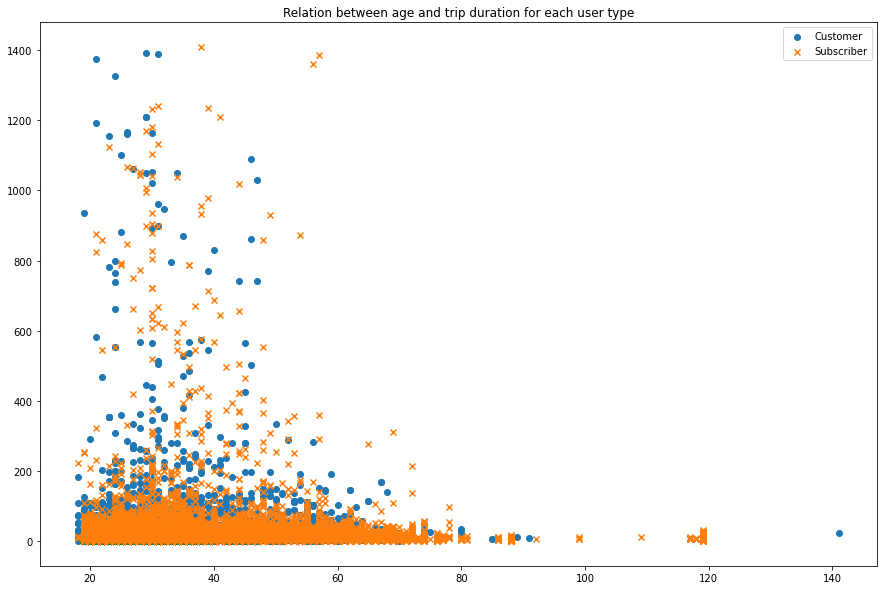

In [168]:
plt.figure(figsize = [15, 10]);
user_type_markers = [['Customer', 'o'],
               ['Subscriber', 'x']]

for cat, marker in user_type_markers:
    GoBike_cat = GoBike[GoBike['user_type'] == cat]
    plt.scatter(data = GoBike_cat, x = 'age', y = 'duration_min', marker = marker);
    
plt.legend(['Customer','Subscriber']);
plt.plot(xL = 'age', yL = 'duration_min')
plt.title("Relation between age and trip duration for each user type");

_-Older Subscribers and Customers take a shorter trip duration_

_-Younger Subscribers have a shorter trip duration than customers_

#### 2. Relationship between user type, time of day and trip duration

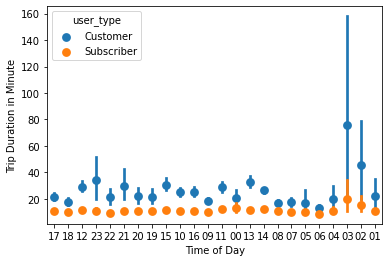

In [169]:
#Point plot between time of day, duration_min and user_type
sb.pointplot(data=GoBike, x='time_of_day', y='duration_min', hue='user_type', linestyles="");
plt.xlabel('Time of Day');
plt.ylabel('Trip Duration in Minute');

_-Customers have a longer trip duration than Subscribers_

_-Subscribers seem to have a consistent trip duration during the day as compared to Customers_

####  3. Relationship between gender, age and trip duration

[]

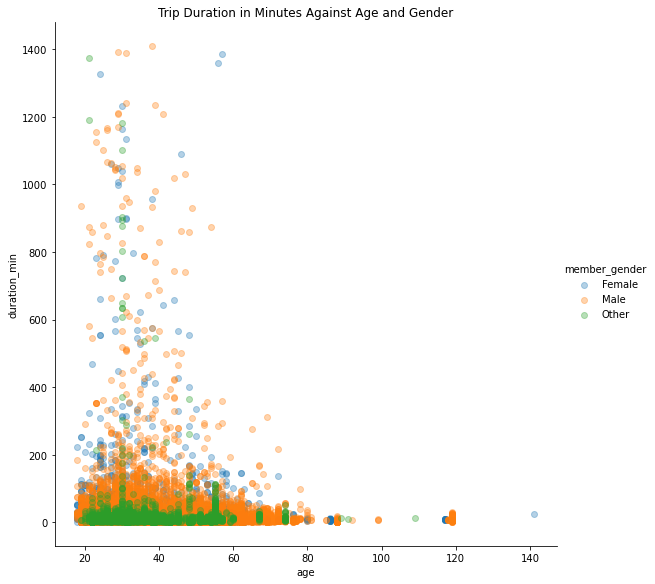

In [172]:
g = sb.FacetGrid(data = GoBike, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'age','duration_min', alpha = 1/3)
g.add_legend()
plt.title('Trip Duration in Minutes Against Age and Gender')
plt.plot(xL = 'age', yL = 'gender')

_-Younger males have a longer trip duration than older males_

_-There's more females than other genders present_

_There's more older males than other genders_


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> More male customers and subscribers utilise the Bike share service durin the week compared to females and other.

> There were more subscribers during different times of day compared to customers.

> Majority of the older users (both customers and subscribers) do not take a long time on their trips(their trip duration is short).

> There are more younger customers than subscribers however, the younger customers have a longer trip duration.

### Were there any interesting or surprising interactions between features?

> There are much more male subscribers and customers who use the Bike Sharing System